# Testing Notebook
This notebook comprises the tests to ensure that the implementation is correct. These tests mainly consist of dimensionality checks.

## Particle

In [2]:
from src.network import SimpleNN
from src.pso import Particle

In [3]:
# Define the model
model = SimpleNN()

# Set initialization ranges for position and velocity
position_init_range = [-1, 1]
velocity_init_range = [-0.5, 0.5]

# Create a particle
particle = Particle(model, position_init_range, velocity_init_range)

# Check if particle position and velocity are within the specified initialization ranges
print("Particle Position:", particle.position)
print("Particle Velocity:", particle.velocity)

# Ensure positions and velocities are within the correct ranges
assert position_init_range[0] <= particle.position.min() <= particle.position.max() <= position_init_range[1]
assert velocity_init_range[0] <= particle.velocity.min() <= particle.velocity.max() <= velocity_init_range[1]
print("Particle initialization test passed.")


Particle Position: [-0.73656087  0.11022458  0.53818321 ...  0.62296536 -0.87309189
 -0.85973159]
Particle Velocity: [-0.09980016 -0.42268111  0.12379271 ... -0.29028329 -0.47410733
  0.20698876]
Particle initialization test passed.


In [4]:
# Calculate the expected dimensionality (number of parameters in the model)
expected_dim = sum(p.numel() for p in model.parameters())

# Check if particle position and velocity have the correct dimensionality
print("Expected Dimensionality:", expected_dim)
print("Particle Position Dimensionality:", len(particle.position))
print("Particle Velocity Dimensionality:", len(particle.velocity))

# Assert that position and velocity have the correct dimensions
assert len(particle.position) == expected_dim, "Particle position dimensionality is incorrect."
assert len(particle.velocity) == expected_dim, "Particle velocity dimensionality is incorrect."

print("Particle dimensionality test passed.")

Expected Dimensionality: 20710
Particle Position Dimensionality: 20710
Particle Velocity Dimensionality: 20710
Particle dimensionality test passed.


## PSO

### Vanilla PSO

In [5]:
from src.pso import PSO
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
torch.cuda.is_available()

True

In [7]:
# Define the model
model = SimpleNN()

# Set PSO parameters
boundary_interval = [-1, 1]
position_init_range = [-1, 1]
velocity_init_range = [-0.5, 0.5]
swarm_size = 10  # Smaller swarm size for testing

# Configure PSO model
pso = PSO(
    model=model,
    boundary_interval=boundary_interval,
    position_init_range=position_init_range,
    velocity_init_range=velocity_init_range,
    swarm_size=swarm_size
)

In [8]:
# Calculate expected dimensionality based on model parameters
expected_dim = sum(p.numel() for p in model.parameters())

# Check dimensionality of each particle in the PSO swarm
for i, particle in enumerate(pso.particles):
    assert len(particle.position) == expected_dim, f"Particle {i+1} position dimensionality is incorrect."
    assert len(particle.velocity) == expected_dim, f"Particle {i+1} velocity dimensionality is incorrect."
    print(f"Particle {i+1} position and velocity dimensionality are correct.")

print("Swarm dimensionality test passed.")

Particle 1 position and velocity dimensionality are correct.
Particle 2 position and velocity dimensionality are correct.
Particle 3 position and velocity dimensionality are correct.
Particle 4 position and velocity dimensionality are correct.
Particle 5 position and velocity dimensionality are correct.
Particle 6 position and velocity dimensionality are correct.
Particle 7 position and velocity dimensionality are correct.
Particle 8 position and velocity dimensionality are correct.
Particle 9 position and velocity dimensionality are correct.
Particle 10 position and velocity dimensionality are correct.
Swarm dimensionality test passed.


In [9]:
# Define transformations for resizing and normalizing the images
transform = transforms.Compose([
    transforms.Resize((14, 14)),  # Resize images to 14x14 as specified
    transforms.ToTensor(),
])

# Load the MNIST training and test sets separately
train_dataset = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data', train=False, transform=transform, download=True)

# Check the sizes of each dataset
train_size = len(train_dataset)
test_size = len(test_dataset)

print(f"Training set size: {train_size} entries")
print(f"Test set size: {test_size} data entries")

Training set size: 60000 entries
Test set size: 10000 data entries


In [10]:
# Initialize data loaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Testing stopping by iterations...


Optimization Progress: 100%|██████████| 5/5 [08:51<00:00, 106.26s/it, Iteration=5, Train Error=2.94, Test Error=2.95]


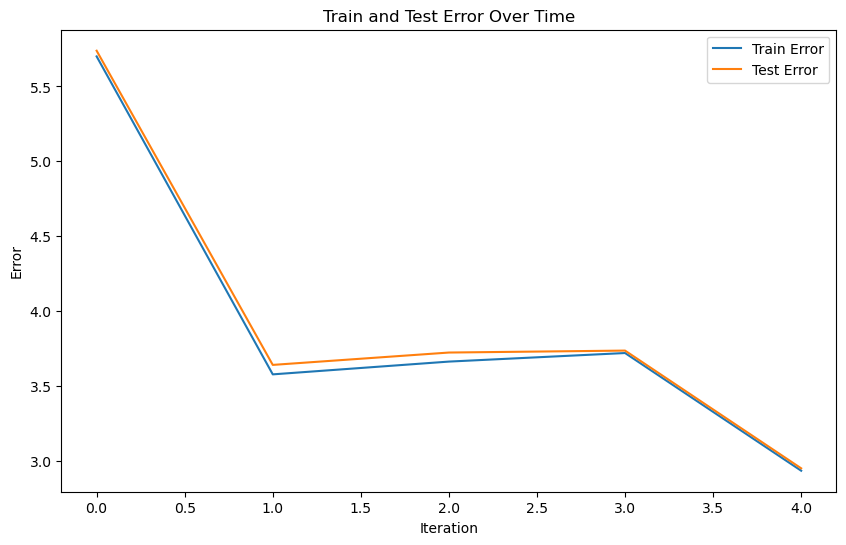

In [11]:
# Re-initialize the model and PSO for testing stopping by iterations
model = SimpleNN()
pso_iterations = PSO(
    model=model,
    boundary_interval=boundary_interval,
    position_init_range=position_init_range,
    velocity_init_range=velocity_init_range,
    swarm_size=swarm_size
)

# Run PSO optimization with stopping by iterations
print("Testing stopping by iterations...")
pso_iterations.optimize(
    train_loader=train_loader,
    test_loader=test_loader,
    iterations=5,          # Specify number of iterations for stopping
    stop_by='iterations',
    activation='sigmoid'
)